<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [5]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [22]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [23]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [24]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Box Plot of Median value of Owner-occupied home')

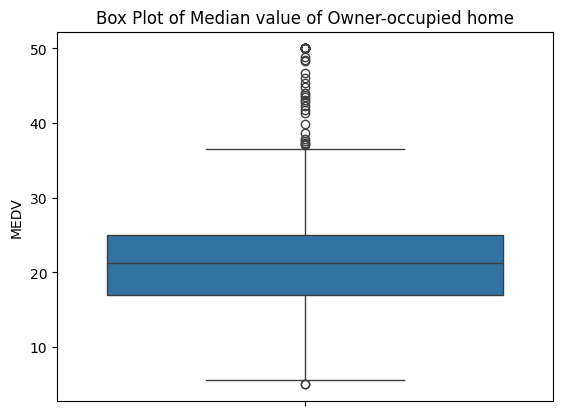

In [55]:
sns.boxplot(y ="MEDV",data=boston_df)
pyplot.title('Box Plot of Median value of Owner-occupied home')

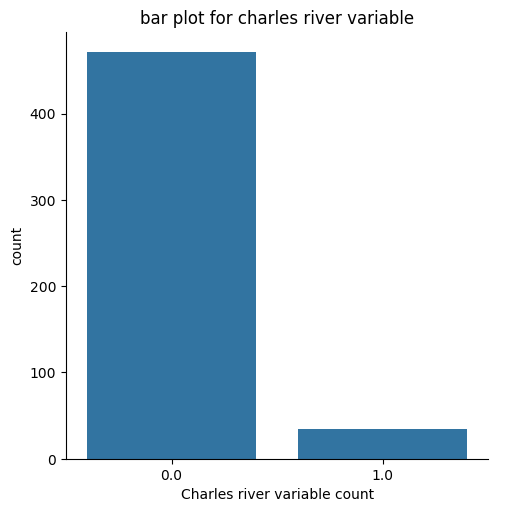

In [53]:
catplot = sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title('bar plot for charles river variable')
pyplot.xlabel('Charles river variable count')
pyplot.show()

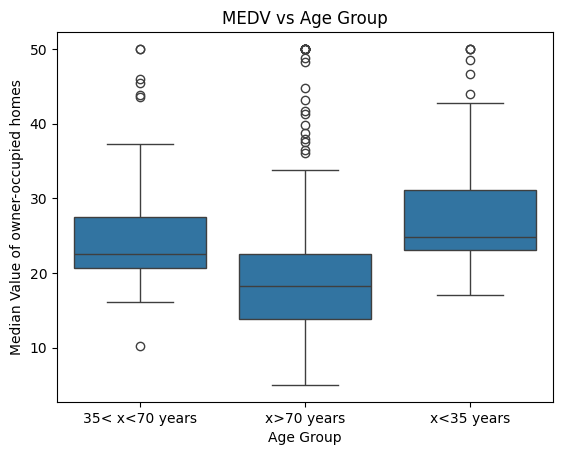

In [51]:
boston_df.loc[(boston_df['AGE'] <= 35), 'group'] = 'x<35 years' 
boston_df.loc[(boston_df['AGE'] > 35)& (boston_df['AGE'] <70),'group'] = '35< x<70 years' 
boston_df.loc[(boston_df['AGE'] >=70), 'group'] = 'x>70 years' 

plot = sns.boxplot(x='group',y='MEDV' ,data = boston_df)
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of owner-occupied homes')
pyplot.title('MEDV vs Age Group')
pyplot.show()

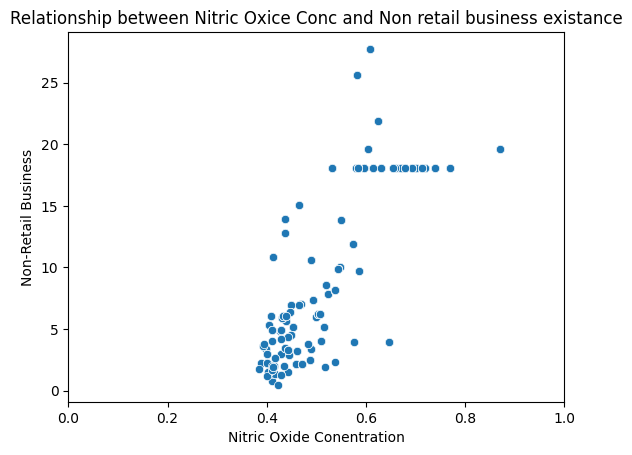

In [59]:
sns.scatterplot(x='NOX',y='INDUS', data=boston_df)
pyplot.xlim(0,1)
pyplot.xlabel('Nitric Oxide Conentration')
pyplot.ylabel('Non-Retail Business')
pyplot.title('Relationship between Nitric Oxice Conc and Non retail business existance')
pyplot.show(plot)    

I see a positive correlation between them

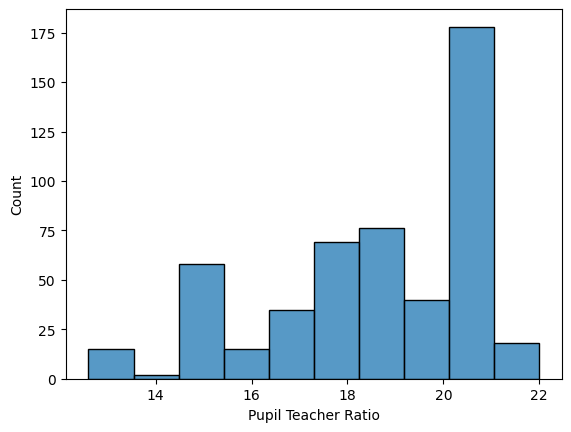

In [62]:
sns.histplot(boston_df['PTRATIO'], bins=10)
pyplot.xlabel('Pupil Teacher Ratio')
pyplot.show()

In [70]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                      boston_df[boston_df['CHAS']==1]['MEDV'], equal_var= False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

H0 - there is no difference in median vakue of houses bounded by charles river.  
H1 - there is a difference in the median value of hosues bounded by charles river.  
Conclusion: p-value 0.003 so we reject null hypothesis, therefore is a difference in the mean values

In [108]:
groups = boston_df.groupby(['group'])['MEDV']
group_arrays = [group.values for _, group in groups]
scipy.stats.f_oneway(*group_arrays)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

In [ ]:
#H0 - the three means are equal.  
#H1 - the three means are different.  
#Conclusion: reject null hypothesis because P-value is small P-value <0.05